In [2]:
import numpy as np
import pickle
from sklearn.metrics import roc_auc_score, f1_score

    with open("./repo/reslist_sv_feature_iter.pickle","rb") as f:
    L=pickle.load(f)

In [3]:
with open("bigdata_for_svm.pickle","rb") as r:
    training_data=pickle.load(r)
    testing_data=pickle.load(r)
    training_class=pickle.load(r)
    testing_class=pickle.load(r)
    

map(lambda x: x[:3],L)

[(0.4269251823425293, 3801, 0.86199158485273486),
 (0.4843411445617676, 4751, 0.887938288920056),
 (0.5513901710510254, 5701, 0.89616643291257581),
 (0.764491081237793, 7602, 0.89336138382421681),
 (0.9441142082214355, 9503, 0.90902290790088824),
 (1.1535530090332031, 11403, 0.91168770453482939),
 (1.4151158332824707, 13304, 0.91126694717157541),
 (1.475064992904663, 14254, 0.910472183263207),
 (1.5513670444488525, 15204, 0.91220196353436178),
 (1.7519760131835938, 17105, 0.91926133707339885),
 (1.9179790019989014, 19006, 0.92412342215988774)]

In [4]:
with open("./repo/reslist_gp_iter.pickle") as g:
    lg=pickle.load(g)

In [5]:
map(lambda x: x[:3], lg)

[(0.6711809635162354, 3801, 0.87526881720430105),
 (0.30768418312072754, 4751, 0.90486208508648902),
 (0.3693850040435791, 5701, 0.91023842917251052),
 (0.40996694564819336, 7602, 0.90869565217391302),
 (0.45121097564697266, 9503, 0.92211313697989727),
 (0.5265281200408936, 11403, 0.92103786816269284),
 (0.5544979572296143, 13304, 0.92201963534361853),
 (0.6130578517913818, 14254, 0.92360916316035524),
 (0.6498658657073975, 15204, 0.92449742870500229),
 (0.7910680770874023, 17105, 0.93347358578775119),
 (0.8453390598297119, 19006, 0.93641888733052825)]

In [6]:
#L[0][3]
from sklearn.metrics import roc_curve, auc
fpr_svm, tpr_svm, thres_svm=roc_curve(testing_class, L[0][3])
roc_auc_svm=auc(fpr_svm, tpr_svm)

fpr_gp, tpr_gp, thresh_gp=roc_curve(testing_class, lg[0][3])
roc_auc_gp=auc(fpr_gp, tpr_gp)

a=5

import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_svm, tpr_svm, 'b', label = 'SVM - %0.2f AUC %i' % (roc_auc_svm,a))
plt.plot(fpr_gp, tpr_gp, 'g', label = 'GP - %0.2f AUC' % roc_auc_gp)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],color='grey', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [7]:
def get_fpr_tpr(testing_class, predicts):
    fpr, tpr, thres=roc_curve(testing_class, predicts)
    return fpr, tpr

from colour import Color
red = Color("grey")
colors = list(red.range_to(Color("red"),len(L)))

In [58]:
def rocks_over_feats(model_iterlist, name, testing_class_only=True):
    
    t_class=testing_class
    if not testing_class_only:
        t_class=np.concatenate([training_class,testing_class])
    
    rates=map(lambda x: get_fpr_tpr(t_class, x[3]), model_iterlist)


    plt.title('%s ROC curves for different feature size' % name)
    for i in range(len(rates)):
        if i==0:
            a_lab="20%% of the features - %0.2f AUC" % auc(rates[i][0], rates[i][1])
        elif i==(len(rates)-1):
            a_lab="All of the features - %0.2f AUC" % auc(rates[i][0], rates[i][1])
        plt.plot(rates[i][0], rates[i][1], color=colors[i].rgb,
                 label =  a_lab if i in [0,len(rates)-1] else None)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],color='grey', linestyle='--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
    plt.savefig("./figs/"+name+"_feat_rocs.png")


In [10]:
kmeans_specs=np.genfromtxt("./repo/kmeans_feature_iteration/kmeans_time_feat_f1.tab")
kmeans_pseudoscore=np.genfromtxt("./repo/kmeans_feature_iteration/kmeans_clusdists_for_rocks.tab")

km_L=[ (kmeans_specs[0,i],int(kmeans_specs[1,i]),kmeans_specs[2,i], kmeans_pseudoscore[:,i]) for i in range(len(kmeans_specs[0]))]
km_f1=map(lambda x: x[2] ,km_L)

class_vec=np.concatenate([training_class, testing_class])
km_aucs=map(lambda x: roc_auc_score(class_vec,x[3]),km_L)
km_L=[ (kmeans_specs[0,i],int(kmeans_specs[1,i]),km_aucs[i], kmeans_pseudoscore[:,i]) for i in range(len(kmeans_specs[0]))]

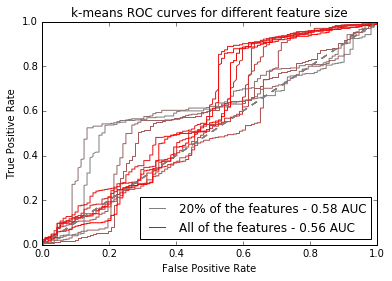

In [59]:
rocks_over_feats(km_L, "k-means", False)

In [12]:
pca_specs=np.genfromtxt("./repo/kmeans_feature_iteration/pca_time_feat_f1.tab")
pca_pseudoscore=np.genfromtxt("./repo/kmeans_feature_iteration/pca_clusdists_for_rocks.tab")

pca_L=[ (pca_specs[0,i],int(pca_specs[1,i]),pca_specs[2,i], pca_pseudoscore[:,i]) for i in range(len(pca_specs[0]))]
pca_f1=map(lambda x: x[2] ,pca_L)
pca_aucs=map(lambda x: roc_auc_score(class_vec,x[3]),pca_L)
pca_L=[ (pca_specs[0,i],int(pca_specs[1,i]),pca_specs[2,i], pca_pseudoscore[:,i]) for i in range(len(pca_specs[0]))]

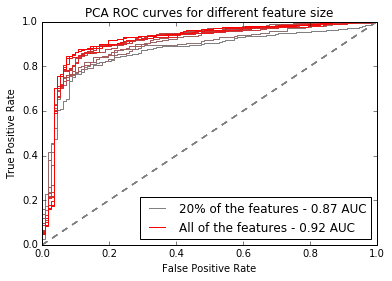

In [60]:
rocks_over_feats(pca_L,"PCA",False)

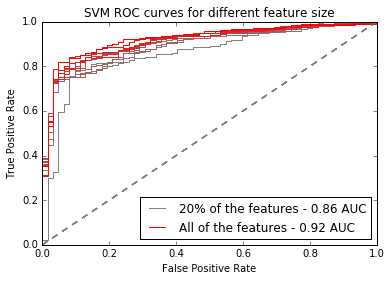

In [61]:
rocks_over_feats(L,"SVM")

tuple

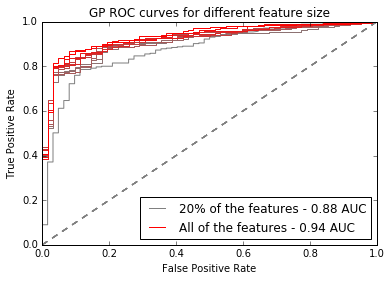

In [64]:
rocks_over_feats(lg,"GP")
type(lg[0])

In [16]:
with open("./repo/reslist_skl_rf_feature_iter.pickle") as s:
    l_sk_rf=pickle.load(s)

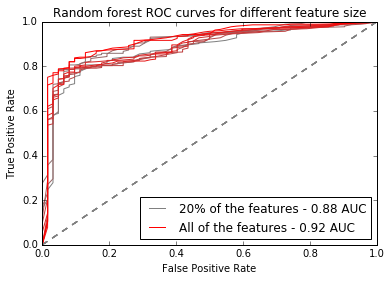

In [66]:
rocks_over_feats(l_sk_rf, "Random forest") #auc not consistently rising (random feats?)

In [68]:
times_by_feat_by_alg=map(lambda l: map(lambda el: el[0], l), [L,lg,l_sk_rf,pca_L, km_L]) #time lists
features=map(lambda x: x[1], L)

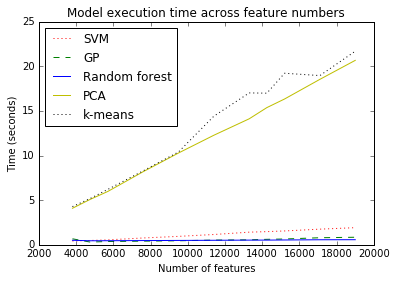

In [71]:
plt.title("Model execution time across feature numbers")
model_colors=['r','g','b','y','black']
model_names=["SVM","GP","Random forest","PCA","k-means"]
model_lty=[":","--","-","-",":"]
for i in range(len(times_by_feat_by_alg)):
    plt.plot(features, times_by_feat_by_alg[i], model_colors[i], label=model_names[i], linestyle=model_lty[i])
    plt.legend(loc="upper left")
    plt.ylabel("Time (seconds)")
    plt.xlabel("Number of features")
plt.savefig("./figs/times_v_features_all.png")#plt.figure()


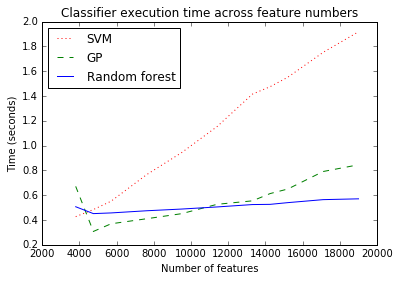

In [73]:
times_by_feat_by_alg=map(lambda l: map(lambda el: el[0], l), [L,lg,l_sk_rf]) #time lists
features=map(lambda x: x[1], L)
plt.title("Classifier execution time across feature numbers")
model_colors=['r','g','b']
model_names=["SVM","GP","Random forest"]
model_lty=[":","--","-","-",":"]
for i in range(len(times_by_feat_by_alg)):
    plt.plot(features, times_by_feat_by_alg[i], model_colors[i], label=model_names[i], linestyle=model_lty[i])
    plt.legend(loc="upper left")
    plt.ylabel("Time (seconds)")
    plt.xlabel("Number of features")
plt.savefig("./figs/times_v_features.png")#plt.figure()


In [46]:
#this was supposed to be on the special testtrain, al ajde
f1s_sgrkp=np.vstack((map(lambda it: np.around([f1_score(testing_class, map(round,i[3])) for i in it], decimals=4), [L, l_sk_rf, lg]),
                     km_f1, pca_f1))
f1s_sgrkp


array([[ 0.8955    ,  0.8742    ,  0.8865    ,  0.883     ,  0.9023    ,
         0.9012    ,  0.9029    ,  0.8975    ,  0.902     ,  0.9074    ,
         0.9138    ],
       [ 0.8811    ,  0.8861    ,  0.8754    ,  0.8641    ,  0.874     ,
         0.8722    ,  0.8746    ,  0.871     ,  0.8732    ,  0.8906    ,
         0.8854    ],
       [ 0.9266    ,  0.9099    ,  0.9201    ,  0.9189    ,  0.9179    ,
         0.9182    ,  0.9215    ,  0.9149    ,  0.9163    ,  0.9224    ,
         0.9275    ],
       [ 0.37117904,  0.37117904,  0.37472767,  0.37472767,  0.4017094 ,
         0.4017094 ,  0.4017094 ,  0.4017094 ,  0.4017094 ,  0.4017094 ,
         0.4017094 ],
       [ 0.86625226,  0.88621157,  0.90332278,  0.90402351,  0.91037523,
         0.91033002,  0.91082731,  0.90942586,  0.90892857,  0.91600362,
         0.91975588]])

[1.0, 0.77159999999999995, 0.51279999999999992]

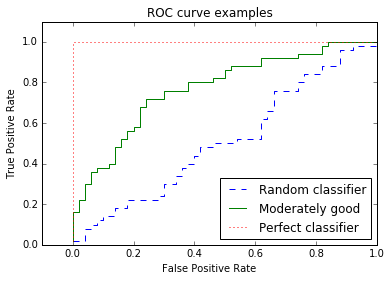

In [99]:
#dummy ROC
dummy_score=np.random.uniform(size=100)
dummy_class=np.repeat([1,0],[50,50])

dummy_rates=get_fpr_tpr(dummy_class, dummy_score)
perfect_rates=get_fpr_tpr(map(round,dummy_score),dummy_score)
ok_class=dummy_class[:]
ok_class[25:75]=map(round,dummy_score)[25:75]
ok_rates=get_fpr_tpr(ok_class, dummy_score)

plt.title("ROC curve examples")
plt.plot(dummy_rates[0], dummy_rates[1], label="Random classifier", color='b', linestyle="--")
plt.plot(ok_rates[0], ok_rates[1], label="Moderately good", color='g', linestyle="-")
plt.plot(perfect_rates[0], perfect_rates[1], label="Perfect classifier"  , color='r', linestyle=":")


plt.legend(loc = 'lower right')
plt.xlim([-0.1, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("./figs/roc_examples.png")

def rocks_dummy(model_iterlist, name):    

    plt.title('%s ROC curves for different feature size' % name)
    for i in range(len(rates)):
        if i==0:
            a_lab="20%% of the features - %0.2f AUC" % auc(rates[i][0], rates[i][1])
        elif i==(len(rates)-1):
            a_lab="All of the features - %0.2f AUC" % auc(rates[i][0], rates[i][1])
        plt.plot(rates[i][0], rates[i][1], color=colors[i].rgb,
                 label =  a_lab if i in [0,len(rates)-1] else None)
       
        plt.plot([0, 1], [0, 1],color='grey', linestyle='--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
    

[auc(perfect_rates[0], perfect_rates[1]), auc(ok_rates[0], ok_rates[1]), auc(dummy_rates[0], dummy_rates[1])]
#[1.0, 0.77159999999999995, 0.51279999999999992]

In [3]:
%load_ext rpy2.ipython

In [11]:
%%R -o reslist_rf

load("./repo/forPy_res_run_list_traintest50.Rdata")

reslist_rf=for_python_rf_traintest_50_iters_careNA


In [86]:
import numpy as np
import pandas as pd

rf_L=list(map(lambda ind: (reslist_rf[ind][0],reslist_rf[ind+1][0],reslist_rf[ind+2][0], np.array(reslist_rf[ind+3])[0]), 
                           range(0,len(reslist_rf),4)))

In [33]:
auc(testing_class, 1-rf_L[3][3])
#rf_L[0]

NameError: name 'rf_L' is not defined